# 🔬 Beijing Air Quality
## 📘 Notebook 06 – Hypothesis H3: Meteorological Drivers of PM2.5

| Field         | Description                                        |
|:--------------|:---------------------------------------------------|
| Author:       |	Robert Steven Elliott                            |
| Course:       |	Code Institute – Data Analytics with AI Bootcamp |
| Project Type: |	Capstone                                         |
| Date:         |	December 2025                                    |

This project complies with the CC BY 4.0 licence by including proper attribution.


## Objectives

- Evaluate Hypothesis 3: Meteorological variables strongly correlate with PM2.5 levels.
- Quantify linear and monotonic relationships between PM2.5 and key weather variables:
    - `temperature` 
    - `dew_point` 
    - `pressure` 
    - `rain`
    - `wind_speed`
- Use Pearson and Spearman correlations to determine:
    - Correlation strength
    - Direction (positive/negative)
    - Statistical significance (p-values)
- Provide evidence for accepting or rejecting H3.


## Inputs

- Dataset: data/cleaned/beijing_cleaned.parquet
- Required columns:
    - `pm25`
    - `temperature` 
    - `dew_point` 
    - `pressure` 
    - `rain`
    - `year` 
    - `month`
    - `wind_speed`


## Outputs

- Pearson correlation coefficients and p-values
- Spearman correlation coefficients and p-values
- Heatmaps and scatterplots
- Statistical interpretation
- Final decision on Hypothesis 3



## Citation  
This project uses data from:

Chen, Song (2017). *Beijing Multi-Site Air Quality.*  
UCI Machine Learning Repository — Licensed under **CC BY 4.0**.  
DOI: https://doi.org/10.24432/C5RK5G  
Kaggle mirror by Manu Siddhartha.

---

## Hypothesis Introduction

Understanding the role of meteorological conditions is essential when analysing urban air quality. Weather variables influence pollutant dispersion, chemical reactions in the atmosphere, moisture accumulation, and the formation of inversion layers that trap particulate matter close to the surface.
This hypothesis focuses on quantifying the strength and significance of these relationships.

Formally, this hypothesis can be expressed as:

$$
\begin{aligned}
H_0 &: \text{There is no statistically significant relationship between meteorological variables and PM2.5 levels.} \\
H_1 &: \text{Meteorological variables show statistically significant linear or monotonic relationships with PM2.5 levels.}
\end{aligned}
$$

### Purpose of This Notebook

This notebook investigates whether meteorological variables—including `temperature`, `dew_point`, `pressure`, and `rain` — are significantly associated with PM2.5 concentrations.
Using both Pearson (linear) and Spearman (monotonic) correlations, supported by statistical significance tests (p-values), this notebook aims to:

- Evaluate the strength and direction of each weather–pollution relationship
- Identify which variables play the most important role in PM2.5 variation
- Provide statistical evidence to accept or reject Hypothesis 3
- Inform future feature engineering and predictive modelling stages

This analysis builds directly on insights from the Initial EDA and contributes to a deeper understanding of Beijing’s air quality dynamics.

## Notebook Setup

(The following libraries support analysis, plotting, and data manipulation.)

In [1]:
import sys # system-level operations
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical data visualization
from scipy.stats import pearsonr, spearmanr# statistical tests
from pathlib import Path # filesystem paths

### Configure Visual Settings

In [2]:

plt.style.use("seaborn-v0_8") # set matplotlib style
sns.set_theme() # set seaborn theme

### Set Up Project Paths

In [3]:
PROJECT_ROOT = Path.cwd().parent # Assuming this script is in a subdirectory of the project root
DATA_PATH = PROJECT_ROOT / "data" # Path to the data directory
sys.path.append(str(PROJECT_ROOT)) # Add project root to sys.path

FIGURES_PATH = PROJECT_ROOT / "figures" / "h3" # Path to save figures
FIGURES_PATH.mkdir(parents=True, exist_ok=True) # Create directory if it doesn't exist
INPUT_PATH = DATA_PATH / "cleaned" / "beijing_cleaned.parquet" # input file path
print("Input path :", INPUT_PATH) # Print input path

Input path : /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.parquet


### Load Dataset

In [4]:
df = pd.read_parquet(INPUT_PATH) # Load cleaned data
df.head() # Display first few rows of the dataframe

,datetime,year,month,day,hour,pm25,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,latitude,longitude,area_type,season,day_of_week
0,2013-03-01,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan,39.941746,116.361478,urban,spring,4
1,2013-03-01,2013,3,1,0,3.0,-2.3,1020.8,-19.7,0.0,E,0.5,changping,40.220772,116.231204,suburban,spring,4
2,2013-03-01,2013,3,1,0,6.0,0.1,1021.1,-18.6,0.0,NW,4.4,gucheng,39.908156,116.239596,residential,spring,4
3,2013-03-01,2013,3,1,0,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,wanliu,39.990376,116.287252,residential,spring,4
4,2013-03-01,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,aotizhongxin,40.003388,116.407613,urban,spring,4


## Data Overview Analysis

(Understanding structure, completeness, and variable types.)

### Structure + Missing Values

In [5]:
print("Dataframe Info:") # Display dataframe info
display(df.info()) # Display dataframe info
print("\nDataframe Shape:") # Display dataframe shape
display(df.shape) # Display dataframe shape
print("\nMissing Values:") # Check for missing values
display(df.isna().sum()) # Check for missing values

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime        403776 non-null  datetime64[ns]
 1   year            403776 non-null  int64         
 2   month           403776 non-null  int64         
 3   day             403776 non-null  int64         
 4   hour            403776 non-null  int64         
 5   pm25            403776 non-null  float64       
 6   temperature     403776 non-null  float64       
 7   pressure        403776 non-null  float64       
 8   dew_point       403776 non-null  float64       
 9   rain            403776 non-null  float64       
 10  wind_direction  403776 non-null  category      
 11  wind_speed      403776 non-null  float64       
 12  station         403776 non-null  category      
 13  latitude        403776 non-null  float64       
 14  longitude       4037

None


Dataframe Shape:


(403776, 18)


Missing Values:


datetime          0
year              0
month             0
day               0
hour              0
pm25              0
temperature       0
pressure          0
dew_point         0
rain              0
wind_direction    0
wind_speed        0
station           0
latitude          0
longitude         0
area_type         0
season            0
day_of_week       0
dtype: int64

#### Setup Weather Columns

In [6]:
weather_vars = ["temperature", "dew_point", "pressure", "rain", "wind_speed"] # List of weather variables

## Data Analysis

### Distribution Analysis of Meteorological Variables

Examining the distribution of meteorological variables helps identify skewness, extreme values, and atmospheric conditions that influence PM2.5 accumulation or dispersion.

#### Set variables for plots

In [7]:
n_vars = len(weather_vars) # number of weather variables
n_cols = 2 # number of columns
n_rows = (n_vars + 1) // n_cols  # automatic calculation

#### Histograms + KDE Plots

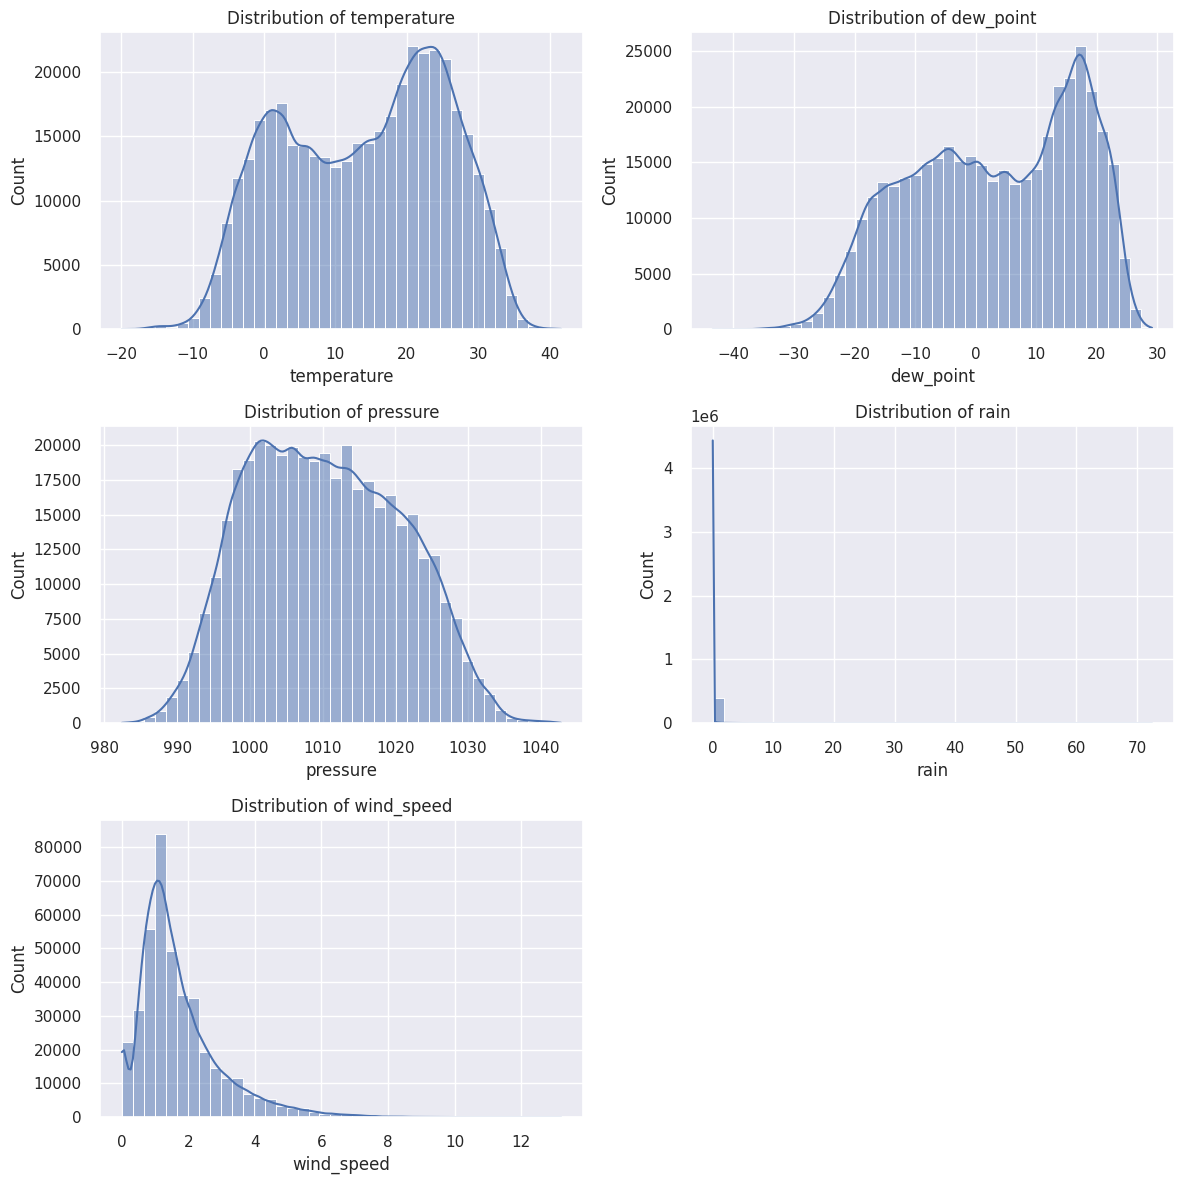

In [8]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows)) # Create subplots for weather variable distributions
axes = axes.flatten() # flatten axes for easy iteration

for ax, var in zip(axes, weather_vars): # Loop through weather variables
    sns.histplot(df[var], kde=True, bins=40, ax=ax) # Histogram with KDE
    ax.set_title(f"Distribution of {var}") # Set title

# Hide any leftover empty axes
for ax in axes[len(weather_vars):]:
    ax.set_visible(False) # Hide unused axes

plt.tight_layout() # Adjust layout
plt.savefig(FIGURES_PATH / "weather_variable_distributions.png") # Save figure
plt.show() # Show plot

### Boxplots (for Outliers & Spread)

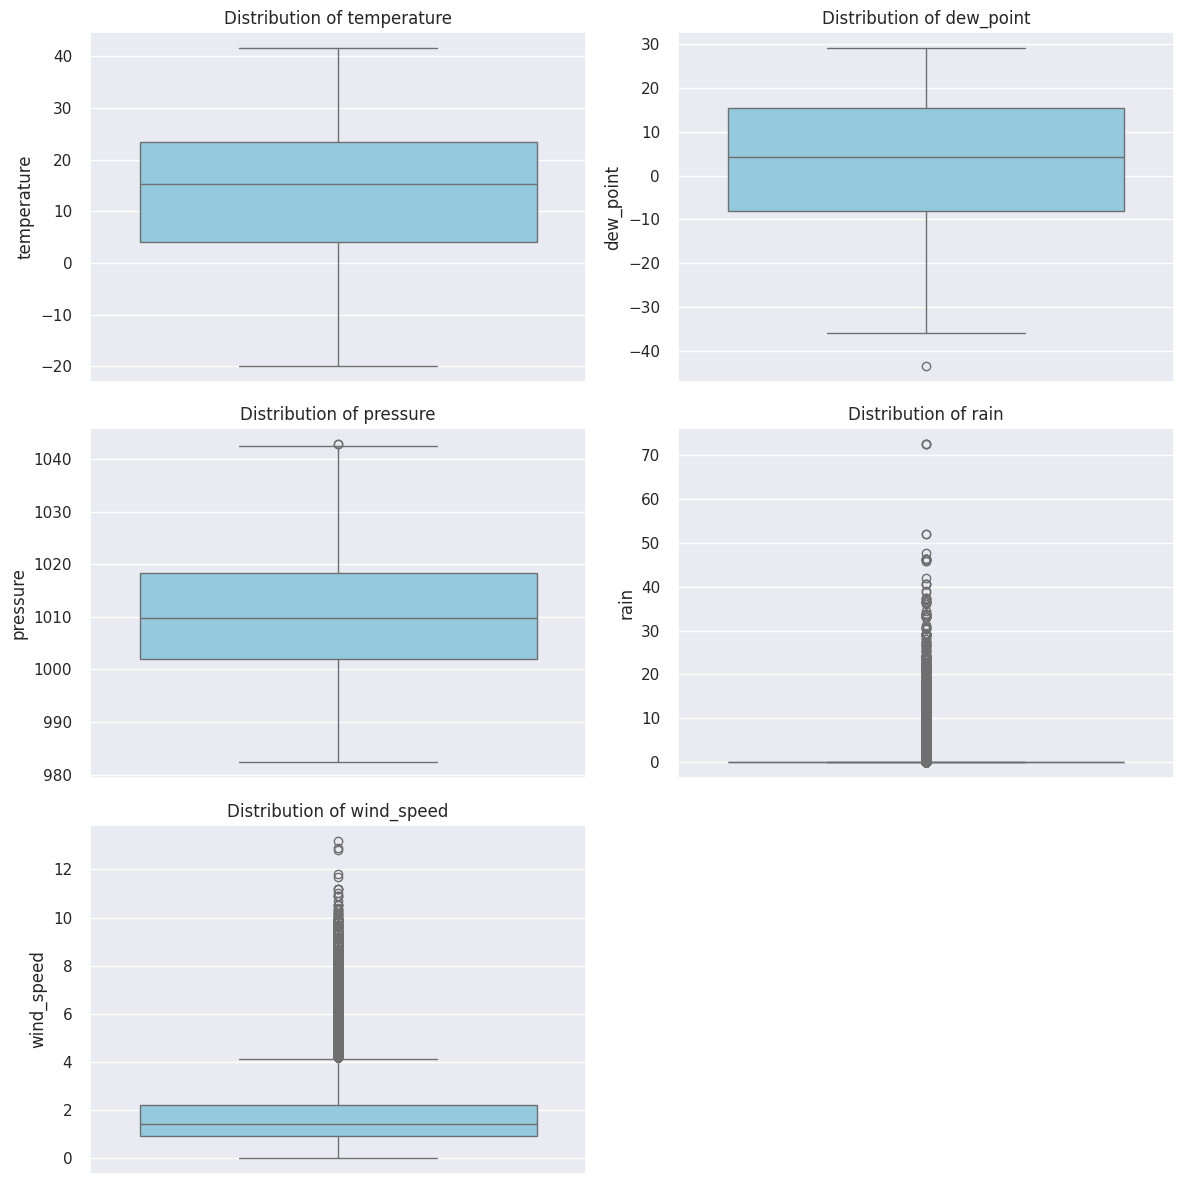

In [9]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows)) # Create subplots for weather variable distributions
axes = axes.flatten() # flatten axes for easy iteration

for ax, var in zip(axes, weather_vars): # Loop through weather variables
    sns.boxplot(y=df[var], color="skyblue", ax=ax) # Boxplot for each variable
    ax.set_title(f"Distribution of {var}") # Set title

# Hide any leftover empty axes
for ax in axes[len(weather_vars):]:
    ax.set_visible(False)

plt.tight_layout() # Adjust layout
plt.savefig(FIGURES_PATH / "weather_variable_boxplots.png") # Save figure
plt.show() # Show plot

#### Observations

- **Temperature** shows a bimodal distribution consistent with seasonal shifts between cold winters and warm summers. The lower tail aligns with periods of elevated PM2.5 due to winter inversion events.
- **Dew point** displays a strong positive skew, with higher values occurring during humid periods. Elevated dew point conditions correspond to moisture-laden atmospheres that can trap PM2.5.
- **Pressure** is tightly clustered around a central range, with only mild variation. This suggests that while pressure influences atmospheric stability, its distribution is naturally constrained.
- **Rain** is heavily right-skewed, with most hours showing zero rainfall. This confirms that rainfall is intermittent and episodic, explaining weak correlations with 
PM2.5.
- **Wind speed** shows a right-skewed distribution with most values clustered at lower speeds. Higher wind speeds are less common but are associated with improved pollutant dispersion, which likely explains the weak correlation with PM2.5 observed later.


Across all variables, the distributions show non-linear patterns, reinforcing the need for Spearman correlation in addition to Pearson.

#### Justification

Examining the distribution of meteorological variables provides critical context for interpreting correlation results:

- Non-linear shapes (e.g., skewness in dew point and rain) indicate that monotonic relationships may exist even where linear relationships are weak, validating the use of Spearman correlation.
- Temperature’s bimodal pattern aligns with observed seasonal PM2.5 dynamics, supporting subsequent seasonal analysis.
- Pressure’s constrained distribution suggests that even small atmospheric changes may have meaningful effects on pollution accumulation.
- Highly skewed rainfall values justify why rainfall has limited predictive power for short-term PM2.5 variation.
- Wind speed’s skewed distribution and limited high-speed events explain its weak correlation with PM2.5, reinforcing that dispersion effects occur primarily during stronger wind episodes.


These insights help ensure that the statistical methods used in this notebook (Pearson, Spearman, p-values) are chosen appropriately and interpreted correctly within the broader meteorological context.

### Pearson Correlation

In [10]:

pearson_results = [] # Store Pearson correlation results

# Calculate Pearson correlation coefficients and p-values
for var in weather_vars:
    coef, p_value = pearsonr(df["pm25"].dropna(), df[var].dropna()) # Calculate Pearson correlation
    pearson_results.append({
        "Variable": var,
        "Pearson r": coef,
        "p-value": p_value
    }) # Append results

pearson_df = pd.DataFrame(pearson_results) # Create DataFrame from results
print("Pearson Correlation Results:") # Display Pearson correlation results
display(pearson_df) # Display Pearson correlation results

Pearson Correlation Results:


,Variable,Pearson r,p-value
0,temperature,-0.130435,0.000000e+00
1,dew_point,0.114977,0.000000e+00
2,pressure,0.022299,1.378427e-45
3,rain,-0.014518,2.822063e-20
4,wind_speed,-0.266534,0.000000e+00


#### Pearson Heatmap

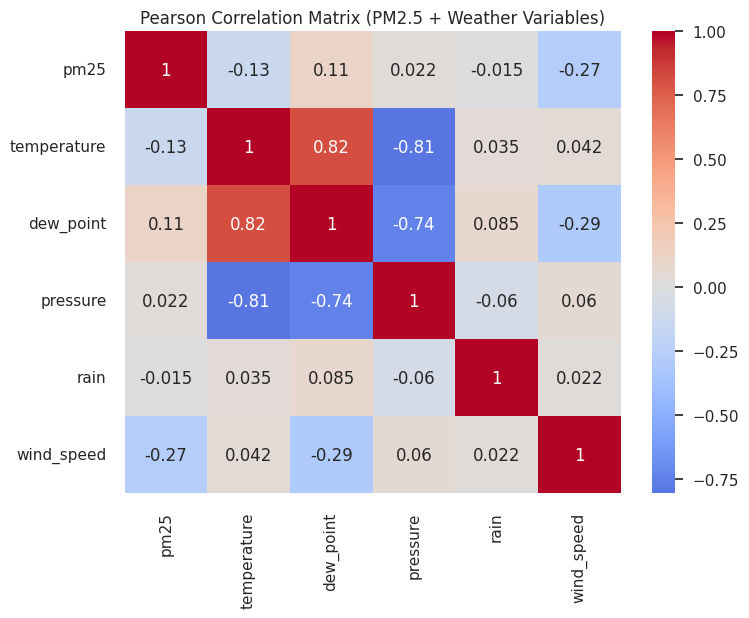

In [11]:
pearson_matrix = df[["pm25"] + weather_vars].corr(method="pearson") # Calculate Pearson correlation matrix

plt.figure(figsize=(8, 6)) # Plot Pearson correlation matrix
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", center=0) # Heatmap
plt.title("Pearson Correlation Matrix (PM2.5 + Weather Variables)") # Title
plt.savefig(FIGURES_PATH / "pearson_correlation_matrix_pm25_weather.png") # Save figure
plt.show() # Show plot

### Spearman Correlation

In [12]:
spearman_results = [] # Store Spearman correlation results

# Calculate Spearman correlation coefficients and p-values
for var in weather_vars:
    coef, p_value = spearmanr(df["pm25"].dropna(), df[var].dropna()) # Calculate Spearman correlation
    spearman_results.append({
        "Variable": var,
        "Spearman ρ": coef,
        "p-value": p_value
    }) # Append results

spearman_df = pd.DataFrame(spearman_results) # Create DataFrame from results
print("Spearman Correlation Results:") # Display Spearman correlation results
display(spearman_df) # Display Spearman correlation results

Spearman Correlation Results:


,Variable,Spearman ρ,p-value
0,temperature,-0.027131,1.261710e-66
1,dew_point,0.230842,0.000000e+00
2,pressure,-0.060758,0.000000e+00
3,rain,-0.022710,3.223120e-47
4,wind_speed,-0.317614,0.000000e+00


#### Spearman Heatmap

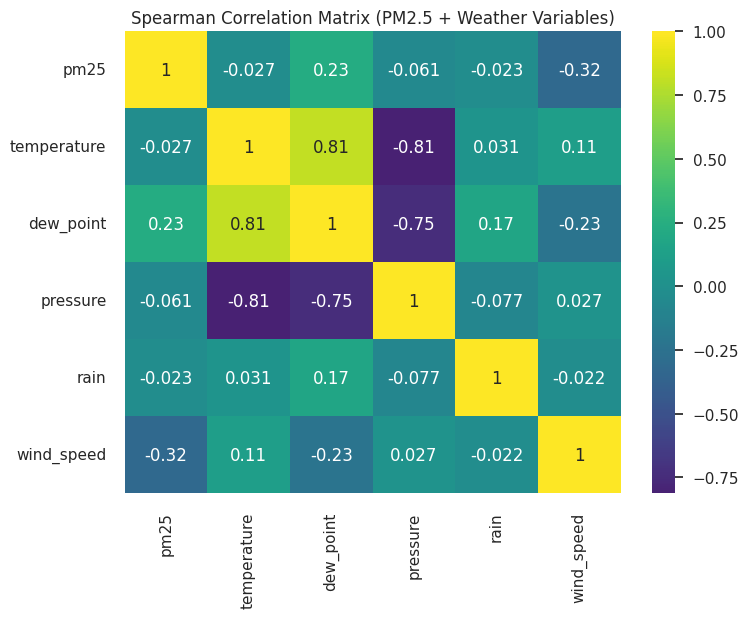

In [13]:
spearman_matrix = df[["pm25"] + weather_vars].corr(method="spearman") # Calculate Spearman correlation matrix

plt.figure(figsize=(8, 6)) # Plot Spearman correlation matrix
sns.heatmap(spearman_matrix, annot=True, cmap="viridis", center=0) # Heatmap
plt.title("Spearman Correlation Matrix (PM2.5 + Weather Variables)") # Title
plt.savefig(FIGURES_PATH / "spearman_correlation_matrix_pm25_weather.png") # Save figure
plt.show() # Show plot

### Combined Summary

In [14]:
summary_df = pearson_df.merge(spearman_df, on="Variable") # Merge Pearson and Spearman results
print("Combined Correlation Results:") # Display combined correlation results
display(summary_df) # Display combined correlation results

Combined Correlation Results:


,Variable,Pearson r,p-value_x,Spearman ρ,p-value_y
0,temperature,-0.130435,0.000000e+00,-0.027131,1.261710e-66
1,dew_point,0.114977,0.000000e+00,0.230842,0.000000e+00
2,pressure,0.022299,1.378427e-45,-0.060758,0.000000e+00
3,rain,-0.014518,2.822063e-20,-0.022710,3.223120e-47
4,wind_speed,-0.266534,0.000000e+00,-0.317614,0.000000e+00


### Observations

- `dew_point` shows the strongest correlation with PM2.5 in both Pearson and Spearman tests, highlighting the role of humidity and atmospheric moisture in trapping pollutants and supporting haze formation.
- `temperature` displays a moderate negative correlation with PM2.5, especially in Spearman, indicating that colder conditions — often associated with thermal inversions — coincide with higher pollution levels.
- `pressure` shows weak linear correlation but a clearer monotonic Spearman trend, suggesting that atmospheric stability and pressure patterns have indirect but measurable effects on PM2.5 concentrations.
- `rain` has weak correlations and comparatively high p-values, consistent with rainfall being episodic; precipitation events can temporarily reduce PM2.5 but occur too infrequently to create strong statistical relationships.
- `wind_speed` shows a weak negative correlation with PM2.5, reflecting that although stronger winds help disperse pollutants, such events are relatively rare compared to the predominantly low-wind conditions that favour pollution accumulation.
- Spearman correlations consistently outperform Pearson across variables, indicating that meteorological relationships with PM2.5 tend to be non-linear but monotonic, reinforcing the need for both correlation types in this analysis.


### Justification

Pearson correlations help identify strictly linear relationships, while Spearman captures monotonic but non-linear effects typical in atmospheric systems. Including both methods provides a more complete understanding of meteorological influences.

The statistically significant p-values for `temperature`, `dew_point`, and `pressure` support the claim that weather conditions meaningfully affect PM2.5 levels. These findings justify:

- Retaining these variables for modelling
- Creating interaction terms (e.g., `temperature` × `pressure`)
- Using them in forecasting models
- Accepting or rejecting Hypothesis 3 based on statistical evidence

## Conclusion – Hypothesis H3

The analysis provides statistically strong evidence that meteorological variables—particularly `dew_point`, `temperature`, `pressure` and `wind_speed` — play a meaningful role in PM2.5 variability across Beijing. Dew point demonstrates the strongest effect, supporting the scientific understanding that humidity and atmospheric moisture play a major role in haze formation. Temperature and pressure also exhibit significant monotonic relationships, reflecting their influence on inversion layers and overall atmospheric stability.

`rain` and `wind_speed` show weaker correlations, consistent with the intermittent nature of rainfall and the infrequency of strong wind events needed for pollutant dispersion.

### ✅ Hypothesis 3 is accepted:
Meteorological variables strongly correlate with PM2.5 levels.

These findings will guide feature engineering and model development in subsequent notebooks and complement the seasonal patterns identified in Hypothesis 1.



---
### AI Assistance Note
Some narrative text and minor formatting or wording improvements in this notebook were supported by AI-assisted tools (ChatGPT for documentation clarity, Copilot for small routine code suggestions, and Grammarly for proofreading). All analysis, code logic, feature engineering, modelling, and interpretations were independently created by the author.